### Importar las librerias que se utilizarán

In [281]:
# para el análisis de datos
import pandas as pd
import matplotlib.pyplot as plt

### Leer los datasets facilitados

In [304]:
cuentas = pd.read_csv("clean_datasets//estado_cuentas.csv", sep=";")
transacciones = pd.read_csv("clean_datasets//transacciones.csv", sep = ";", low_memory=False)
usuarios = pd.read_csv("clean_datasets//usuarios.csv", sep = ";")
customers = pd.read_csv("clean_datasets//customers.csv", sep = ";")

#### Análisis Exploratorio de Datos - Dataset: Cuentas

##### Creación de columnas relevantes al análisis

In [283]:
cuentas["cripto_acc_created_at"] = pd.to_datetime(cuentas["cripto_acc_created_at"])
cuentas["weekday"] = cuentas["cripto_acc_created_at"].dt.day_name()
cuentas["hour"] = cuentas["cripto_acc_created_at"].dt.hour

In [284]:
#para imprimir el dataframe
cuentas

,cust_id,cripto_acc_status,cripto_acc_created_at,weekday,hour
0,192047,disabled,2021-12-16 11:31:37,Thursday,11
1,236745,disabled,2021-12-21 14:11:58,Tuesday,14
2,146948,disabled,2021-12-22 15:56:23,Wednesday,15
3,139853,disabled,2021-12-12 17:42:13,Sunday,17
4,230446,disabled,2021-12-14 12:18:26,Tuesday,12
...,...,...,...,...,...
61387,173129,investing,2021-12-27 19:12:54,Monday,19
61388,77677,investing,2021-12-27 12:32:52,Monday,12
61389,196424,investing,2021-12-27 07:57:10,Monday,7
61390,157363,investing,2021-12-26 21:29:35,Sunday,21


In [285]:
# para averiguar el número de cuentas únicos
print(cuentas["cust_id"].nunique())

# para averiguar el numero de cuentas totales
print(len(cuentas["cust_id"]))

#cantidad de valores duplicados
print("Existe un total de", len(cuentas["cust_id"]) - cuentas["cust_id"].nunique(), "valores duplicados")

61390
61392
Existe un total de 2 valores duplicados


In [286]:
# localizamos las cuentas duplicadas
cuentas["duplicated"] = cuentas["cust_id"].duplicated()
cuentas.loc[cuentas["duplicated"] == True]

,cust_id,cripto_acc_status,cripto_acc_created_at,weekday,hour,duplicated
4286,3783,investing,2021-12-10 17:05:12,Friday,17,True
57027,148756,investing,2021-12-11 13:27:11,Saturday,13,True


In [287]:
# localizamos los estatus pendientes
cuentas.loc[cuentas["cripto_acc_status"] == "pending"]

,cust_id,cripto_acc_status,cripto_acc_created_at,weekday,hour,duplicated
1609,3783,pending,2021-12-10 17:05:46,Friday,17,False
1610,148756,pending,2021-12-11 13:27:11,Saturday,13,False


#### Gráficos exploratorios del Dataset

<AxesSubplot:xlabel='weekday'>

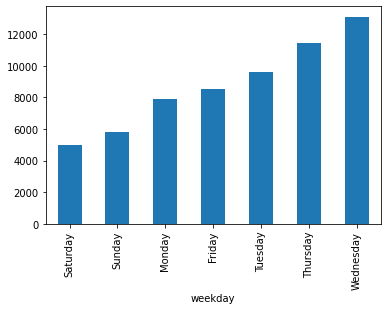

In [288]:
#en qué día de la semana se crean más cuentas?
cuentas.groupby("weekday").count()["cust_id"].sort_values().plot(kind = "bar")

<AxesSubplot:xlabel='hour'>

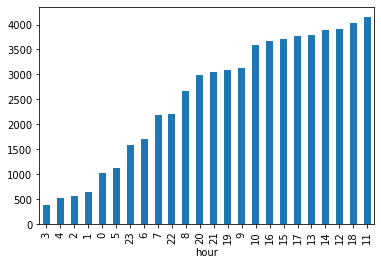

In [289]:
# a que hora del día se crean más cuentas?
cuentas.groupby("hour").count()["cust_id"].sort_values().plot(kind = "bar")

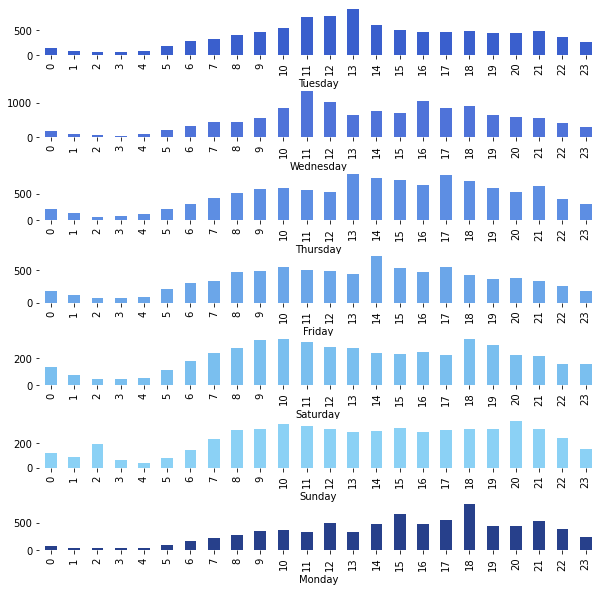

In [290]:
# create a figure with seven subplots
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(10, 10))

# seven ascending shades of blue for the seven days of the week
colors = ["#27408B", "#3A5FCD", "#4F73D9", "#5D8EE3", "#6BA6E9", "#7ABFEF", "#8BD1F5"]

order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
cuentas['weekday'] = pd.Categorical(cuentas['weekday'], order)

for weekday, index in zip(cuentas.sort_values("weekday")["weekday"].unique(), range(7)):

    plot = cuentas.loc[cuentas["weekday"] == weekday].groupby("hour").count()["cust_id"].plot(kind = "bar", color = colors[index])
    plot.set_xlabel(f"{weekday}")

    for spine in plot.spines.values():
        spine.set_visible(False)

    fig.add_subplot(axes[index])

plt.subplots_adjust(hspace=0.7)

array([<AxesSubplot:ylabel='cust_id'>], dtype=object)

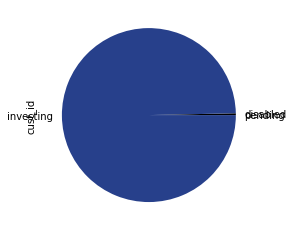

In [291]:
# cuál es la proporción de estados de las cuentas?
cuentas.groupby("cripto_acc_status").count()["cust_id"].plot(kind = "pie", subplots = True, colors = ["#000000", "#27408B"])

#### Exploratory Data Analysis - Transacciones

In [292]:
# tabla de resumen de razones de error de transacción
transacciones.loc[transacciones["cripto_trx_status"] == "CANCELLED"].groupby("cripto_trx_status_detail").count()["cust_id"].sort_values(ascending=False).to_frame()

,cust_id
cripto_trx_status_detail,
CLEANING_PROCESS,55407
PAYMENTS_REJECTED,99
PROVIDER_CONNECTION_ERROR,84
PAYMENTS_CONNECTION_ERROR,65
PROVIDER_QUOTE_EXPIRED,15
KYC_CONNECTION_ERROR,2


array([<AxesSubplot:ylabel='cust_id'>], dtype=object)

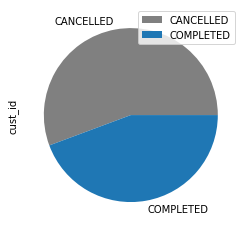

In [293]:
transacciones.groupby("cripto_trx_status").count()["cust_id"].plot(kind = "pie", subplots = True, colors = ["#808080", "#1f77b4"], legend = True)

array([<AxesSubplot:ylabel='cust_id'>], dtype=object)

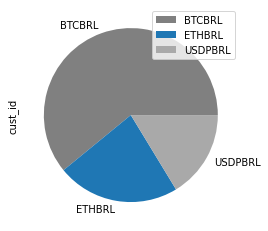

In [294]:
transacciones.groupby("cripto_market").count()["cust_id"].plot(kind = "pie", subplots = True, legend = True, colors = ["#808080", "#1f77b4", "#A9A9A9"])


<AxesSubplot:ylabel='Frequency'>

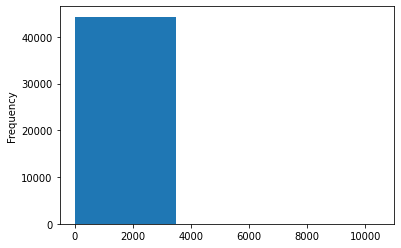

In [310]:
# cómo se distribuyen las transacciones?
transacciones.loc[transacciones["cripto_trx_status"] == "COMPLETED"].groupby("trx_id").sum()["cripto_trx_total_amount"].plot(kind = "hist", bins = 3)


In [297]:
# para filtrar usuarios que compraron más de una vez
transacciones_usuarios = transacciones.groupby("cust_id").sum()["cripto_trx_total_amount"].sort_values(ascending = False).to_frame()
transacciones_usuarios.head(10)

,cripto_trx_total_amount
cust_id,
33407,76000.00
23914,75857.51
82729,72000.00
4716,68100.00
187539,57814.59
45992,45095.10
133,45000.00
115389,39000.00
65253,38833.45


In [298]:
# el top 20%  de los usuarios representa el 92% de las compras
transacciones_usuarios.head(int(len(transacciones)*0.2))["cripto_trx_total_amount"].sum() / transacciones_usuarios["cripto_trx_total_amount"].sum()

0.9607494390944771

#### Exploratory Data Analysis - Customers

<AxesSubplot:xlabel='cus_country'>

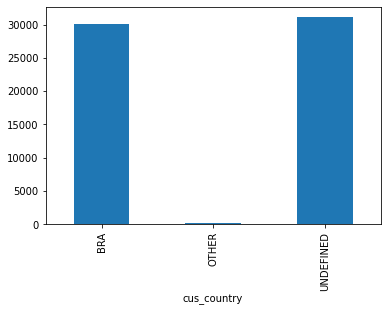

In [305]:
# se investiga los principales mercados de transacciones
customers.groupby("cus_country").count()["cust_id"].plot(kind = "bar")

array([<AxesSubplot:ylabel='cust_id'>], dtype=object)

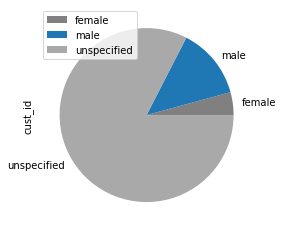

In [309]:
customers.groupby("cust_sex").count()["cust_id"].plot(kind = "pie", subplots = True, colors = ["#808080", "#1f77b4", "#A9A9A9"], legend = True)